# Curve Fitting Basics

In [90]:
import numpy as np
import matplotlib.pyplot as plt

$$y = 2(x-4)^3 + 20$$

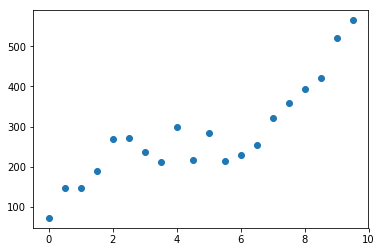

In [135]:
x = np.arange(0,10,0.5)
y = 2*(x-4)**3 + 200 + np.random.rand(x.size)*100

plt.scatter(x,y)
plt.show()

In [150]:
def hypothesis(theta, x):
    y = 0
    for i in range(0,len(theta)):
        y = y + theta[i]*x**i
    return y

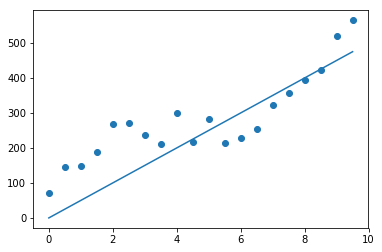

In [210]:
for i in range(0,x.size):
    y_pred[i] = hypothesis([0,50],x[i])
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

In [211]:
def cost(y, y_pred):
    return sum((y - y_pred)**2 / (2*y.size))

In [212]:
cost(y,y_pred)

3516.7621554445691

In [214]:
cost(y, hypothesis([0,50],x))

3516.7621554445691

In [215]:
def grad(y,hypothesis, theta, x):
    dcost = np.zeros(len(theta))
    for i in range(0,len(theta)):
        th = np.zeros(len(theta))
        th[i] = 0.001
        dcost[i] = (cost(y,hypothesis(np.add(theta, th),x)) - cost(y,hypothesis(theta,x)))/th[i]
    return dcost

In [245]:
theta = [0,50, 10]
print(len(theta))
dcost1 = (cost(y,hypothesis(np.add(theta, [0.001,0,0]),x)) - cost(y,hypothesis(theta,x)))/0.001
dcost2 = (cost(y,hypothesis(np.add(theta, [0,0.001,0]),x)) - cost(y,hypothesis(theta,x)))/0.001
dcost3 = (cost(y,hypothesis(np.add(theta, [0,0,0.001]),x)) - cost(y,hypothesis(theta,x)))/0.001
print(dcost1, dcost2, dcost3)

3
(265.09855313634034, 2165.8379601431079, 17142.21285333042)


In [246]:
dcost = grad(y,hypothesis,theta,x)
print(dcost)

[   265.09855314   2165.83796014  17142.21285333]


In [258]:
theta = [0,0]
count = 0
learning_rate = -0.01
dtheta = np.arange(0,10)
while dtheta.max()>0.1:
    dcost = grad(y,hypothesis, theta, x)
    theta_1 = np.add(theta, np.array(dcost)*learning_rate)
    dtheta = (100*np.abs(np.subtract(theta_1, theta))**2)/theta_1
    theta = theta_1
    y_pred = hypothesis(theta,x)
    #print(count, cost(y,y_pred), dtheta, dtheta.max())
    count+=1
print 'Iterations:',count 
print 'Update:',dtheta
print 'Error:', cost(y,y_pred)
print 'Theta:', theta

Iterations: 128
Update: [ 0.09951508  0.00189269]
Error: 2461.53588592
Theta: [ 37.34732133  47.27921632]


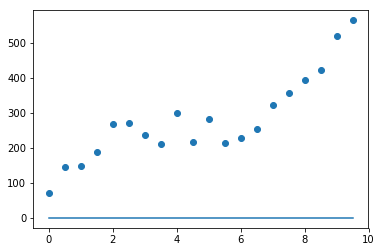

In [257]:
for i in range(0,x.size):
    y_pred[i] = hypothesis(theta,x[i])
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()